In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing DATASET

In [24]:
df = pd.read_csv("C:/Users/Mohd idrees/Desktop/New folder/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [26]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [27]:
# check for missing values in the dataset.

df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [28]:
# checking for outliers and distribution of the data 

df['person_emp_length'].value_counts(dropna=False)

person_emp_length
0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
NaN       895
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

In [29]:
# Find out how many people have employment years more than 40.

df[df['person_emp_length'] > 40]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25


In [30]:
# We are capping the employee length that is greater than 40 to 40.

df['person_emp_length'] = df['person_emp_length'].apply(lambda x:40 if x > 40 else x)

# Pre-processing

# Why Median to fill missing values in person_emp_length column

🧠 Why Use the Median?
The median is robust to outliers. It reflects the central tendency of employment length without getting skewed by extreme values (like we saw earlier—123, 41, etc.).

It’s ideal when the data distribution is not symmetric. If the column is right-skewed (many short-tenure folks), the mean would overestimate the average.

In your case, person_emp_length has a wide spread and some odd entries, so median gives a realistic fill without biasing the model.

📊 Why Not Mean?
The mean is sensitive to high outliers. That 123.0 value would heavily pull the average upward if not capped first.

Mean is better when data is clean and normally distributed—which this column isn’t.

📈 Why Not Mode?
The mode represents the most frequent value. In your output, that’s 0.0 (unemployed).

Filling missing values with 0.0 could imply joblessness where it may not be true, introducing bias.

So in real-world modeling: 👉 Median strikes the balance between being informed and being fair.

Let me know once you’ve filled the nulls—and we’ll take on loan_int_rate next. You’re thinking like a serious data scientist already.

In [31]:
# filling the missing values with the median.

df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [32]:
# Exploring loan_int_rate column as it also has missing values. So we have to first understand the data distribution of the column and then decide 
# which method would be best to fill the missing values in this column.

df['loan_int_rate'].describe()

count    29465.000000
mean        11.011695
std          3.240459
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

# Why median to fill missing values in loan_int_rate column

You're absolutely right: when the mean and median are very close, like in this case (mean = 11.01, median = 10.99), both are reasonable choices for imputation. But here’s why median still edges ahead in a credit risk setting:

🧠 Business-Centered Justification for Using Median
More conservative: Financial models prefer stability over sensitivity. Median keeps your model slightly less reactive to rare high interest rates (like 23.22%).

Protects interpretability: In stakeholder conversations, median is easier to justify when outliers exist—even if they're rare. It shows you're mitigating risk rather than assuming symmetry.

Aligns with risk control thinking: Institutions often benchmark against medians to avoid skew from outlier behavior.

🧪 Modeling Angle
If you were building this for a bank or credit bureau:

You’d likely be asked: “How did you handle missing rates?”

Answering “We used median to balance out rare spikes and preserve typical behavior” sounds more reassuring to both business and technical audiences.

But just to be clear: in this specific case, either mean or median would technically work. So if you're building an experimental version first and want to test both, go for it—you can even compare model performance using each version.

Want to log this decision in a notebook or markdown for your documentation? It'll help during interviews and portfolio reviews too. Let’s keep this project crisp and defendable 🔐

In [33]:
# filling the missing values in loan_int_rate with the median.

df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [34]:
# checking again if there are any missing values in our dataset.

df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [35]:
df.info() # Dtype object can be considered as categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [36]:
# we are exploring categorical variables one by one

In [37]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

# 🧩 Why Use One-Hot Encoding?

One-hot encoding is perfect for categorical variables without any inherent order—like person_home_ownership, which has values like "RENT", "OWN", "MORTGAGE", and "OTHER". Here's what it does:

Converts each category into a separate binary column (0 or 1)

Prevents the model from assuming ordinal relationships (e.g. that "OWN" is greater than "RENT")

Works well with tree-based models like Random Forest and XGBoost

🛠️ Other Encoding Techniques (and When to Use Them)

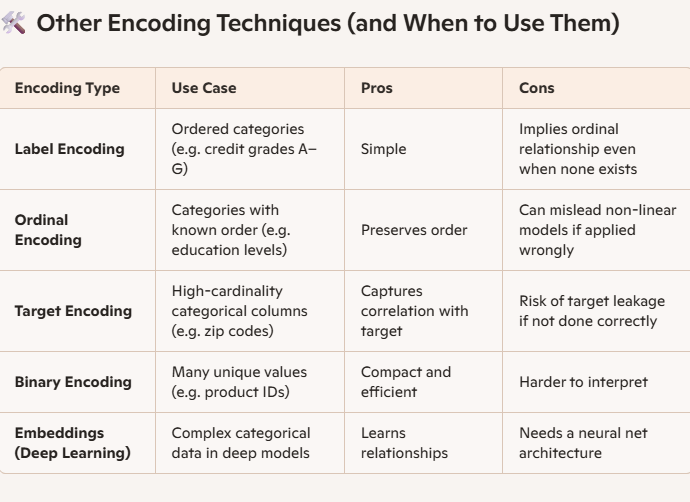

🎯 For Your Project
For person_home_ownership, one-hot is clean and safe. For other features like loan_grade or loan_intent, you might experiment with label encoding or even target encoding—if your model supports it and you're careful with validation.

Let me know when you’re ready—we can dive into loan_intent next and choose the best encoding based on what shows up. You’re building this with serious rigor!

In [38]:
# Applying one-hot encoding to person_home_ownership column.

df = pd.get_dummies(df, columns=['person_home_ownership'])

In [39]:
df.head()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22,59000,40.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,False,False,False,True
1,21,9600,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,False,False,True,False
2,25,9600,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,True,False,False,False
3,23,65500,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,False,False,False,True
4,24,54400,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,False,False,False,True


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_emp_length               32581 non-null  float64
 3   loan_intent                     32581 non-null  object 
 4   loan_grade                      32581 non-null  object 
 5   loan_amnt                       32581 non-null  int64  
 6   loan_int_rate                   32581 non-null  float64
 7   loan_status                     32581 non-null  int64  
 8   loan_percent_income             32581 non-null  float64
 9   cb_person_default_on_file       32581 non-null  object 
 10  cb_person_cred_hist_length      32581 non-null  int64  
 11  person_home_ownership_MORTGAGE  32581 non-null  bool   
 12  person_home_ownership_OTHER     

In [41]:
# understanding the distribution of loan_intent column

df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [42]:
# Applying one hot encoding

df = pd.get_dummies(df, columns=['loan_intent'])

In [43]:
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,40.0,D,35000,16.02,1,0.59,Y,3,False,False,False,True,False,False,False,False,True,False
1,21,9600,5.0,B,1000,11.14,0,0.10,N,2,False,False,True,False,False,True,False,False,False,False
2,25,9600,1.0,C,5500,12.87,1,0.57,N,3,True,False,False,False,False,False,False,True,False,False
3,23,65500,4.0,C,35000,15.23,1,0.53,N,2,False,False,False,True,False,False,False,True,False,False
4,24,54400,8.0,C,35000,14.27,1,0.55,Y,4,False,False,False,True,False,False,False,True,False,False


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_emp_length               32581 non-null  float64
 3   loan_grade                      32581 non-null  object 
 4   loan_amnt                       32581 non-null  int64  
 5   loan_int_rate                   32581 non-null  float64
 6   loan_status                     32581 non-null  int64  
 7   loan_percent_income             32581 non-null  float64
 8   cb_person_default_on_file       32581 non-null  object 
 9   cb_person_cred_hist_length      32581 non-null  int64  
 10  person_home_ownership_MORTGAGE  32581 non-null  bool   
 11  person_home_ownership_OTHER     32581 non-null  bool   
 12  person_home_ownership_OWN       

In [45]:
# understanding the distribution of loan_grade column

df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [46]:
# Applying label encoding on this column since this is related to the grades of the loan. Hence, not good to apply one-hot encoding.

grade_mapping = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

df['loan_grade'] = df['loan_grade'].map(grade_mapping)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_emp_length               32581 non-null  float64
 3   loan_grade                      32581 non-null  int64  
 4   loan_amnt                       32581 non-null  int64  
 5   loan_int_rate                   32581 non-null  float64
 6   loan_status                     32581 non-null  int64  
 7   loan_percent_income             32581 non-null  float64
 8   cb_person_default_on_file       32581 non-null  object 
 9   cb_person_cred_hist_length      32581 non-null  int64  
 10  person_home_ownership_MORTGAGE  32581 non-null  bool   
 11  person_home_ownership_OTHER     32581 non-null  bool   
 12  person_home_ownership_OWN       

In [48]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

In [50]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'N':0, 'Y':1})

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_emp_length               32581 non-null  float64
 3   loan_grade                      32581 non-null  int64  
 4   loan_amnt                       32581 non-null  int64  
 5   loan_int_rate                   32581 non-null  float64
 6   loan_status                     32581 non-null  int64  
 7   loan_percent_income             32581 non-null  float64
 8   cb_person_default_on_file       32581 non-null  int64  
 9   cb_person_cred_hist_length      32581 non-null  int64  
 10  person_home_ownership_MORTGAGE  32581 non-null  bool   
 11  person_home_ownership_OTHER     32581 non-null  bool   
 12  person_home_ownership_OWN       

In [49]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

# 🧼 Preprocessing Recap

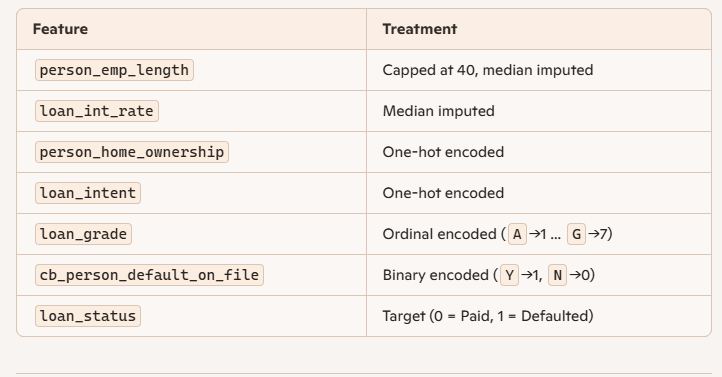

In [54]:
# Converting all boolean columns into integer

df = df.astype({col: 'int64' for col in df.select_dtypes(include='bool').columns})

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_emp_length               32581 non-null  float64
 3   loan_grade                      32581 non-null  int64  
 4   loan_amnt                       32581 non-null  int64  
 5   loan_int_rate                   32581 non-null  float64
 6   loan_status                     32581 non-null  int64  
 7   loan_percent_income             32581 non-null  float64
 8   cb_person_default_on_file       32581 non-null  int64  
 9   cb_person_cred_hist_length      32581 non-null  int64  
 10  person_home_ownership_MORTGAGE  32581 non-null  int64  
 11  person_home_ownership_OTHER     32581 non-null  int64  
 12  person_home_ownership_OWN       

# EDA

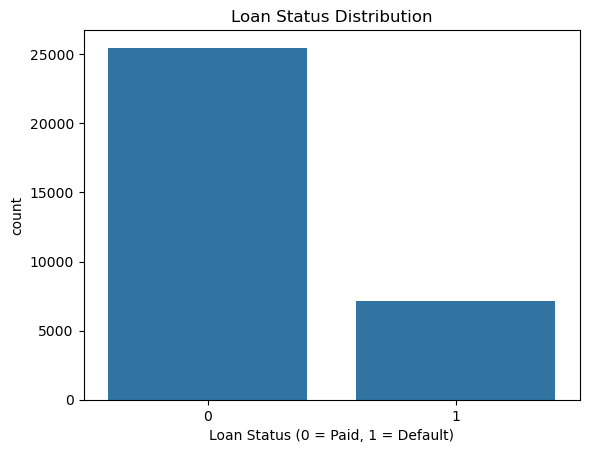

In [61]:
# Loan status distribution

sns.countplot(x='loan_status', data = df)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0 = Paid, 1 = Default)')
plt.ylabel('count')
plt.show()

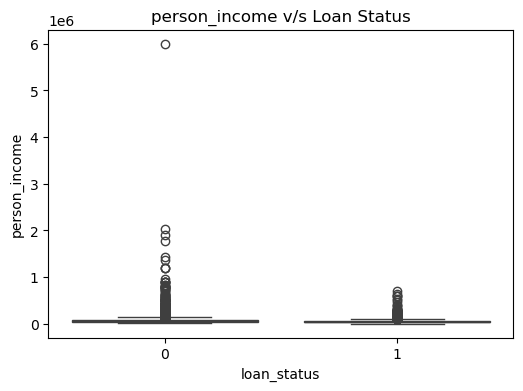

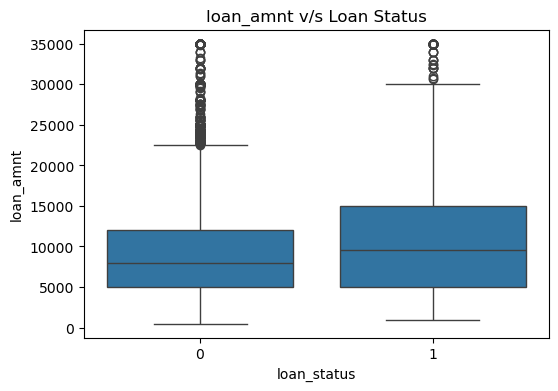

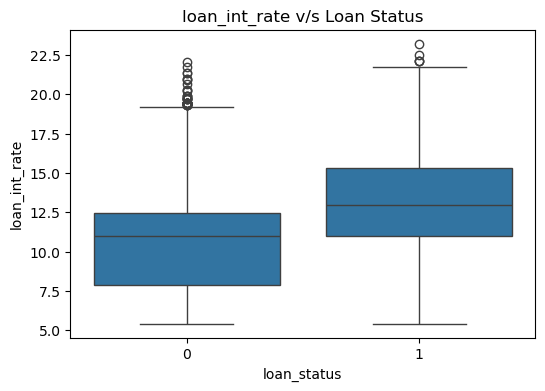

In [63]:
# comparing how different numeric features behave for loans that were paid off (loan_status = 0) vs those that defaulted (loan_status = 1).

numeric_cols = ['person_income', 'loan_amnt', 'loan_int_rate']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f"{col} v/s Loan Status")
    plt.show()

In [ ]:
# people default in loan with high interest rates

In [64]:
df.groupby('loan_status')['loan_amnt'].mean()

loan_status
0     9237.464178
1    10850.502954
Name: loan_amnt, dtype: float64

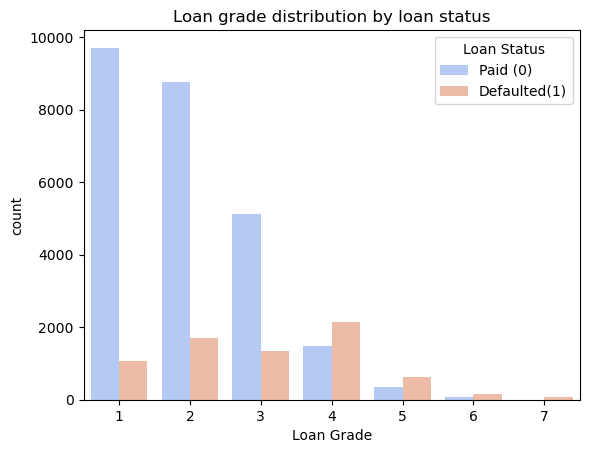

In [67]:
sns.countplot(data=df, x='loan_grade', hue='loan_status', palette='coolwarm')
plt.title('Loan grade distribution by loan status')
plt.xlabel('Loan Grade')
plt.ylabel('count')
plt.legend(title='Loan Status', labels=['Paid (0)', 'Defaulted(1)'])
plt.show()

In [ ]:
# people in grade D are the maximum default followed by grade B, C, A, E, F, G. 

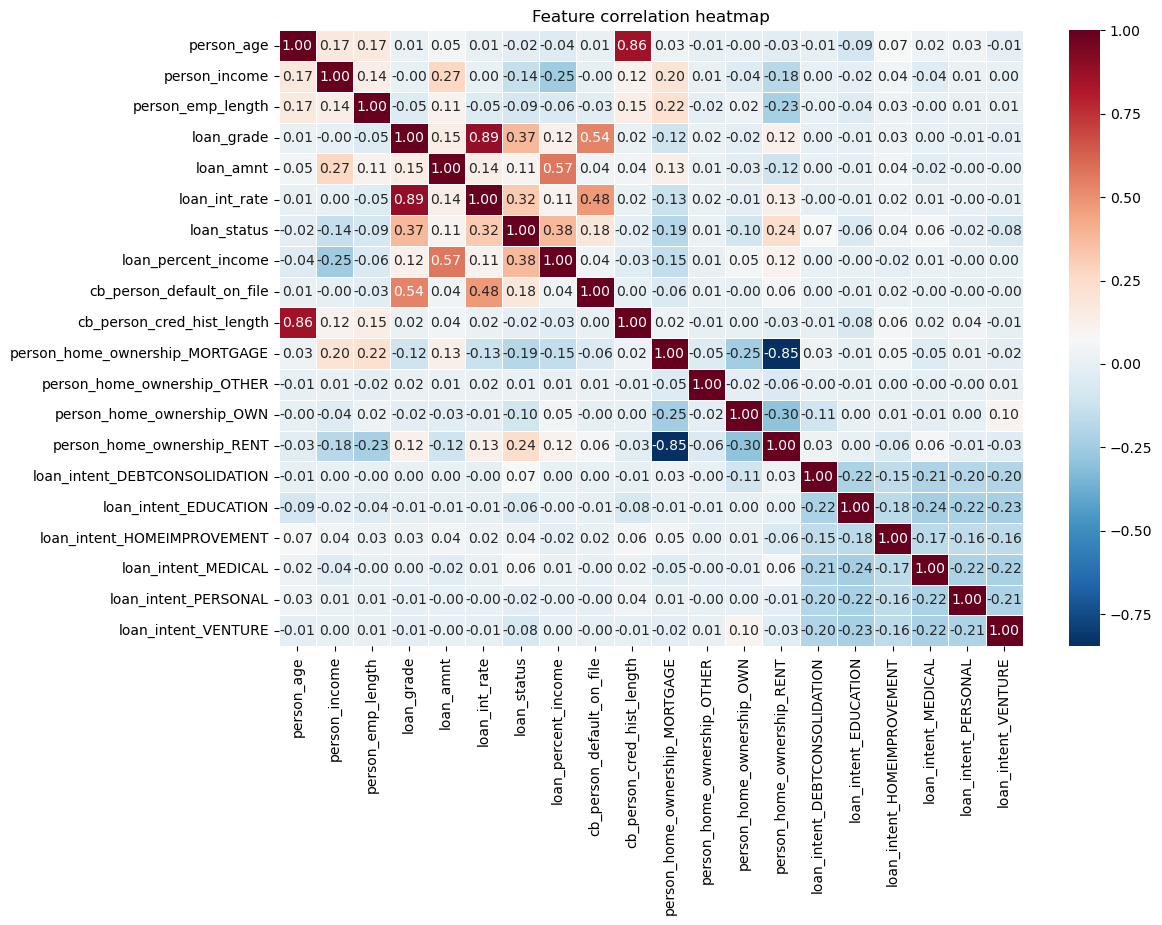

In [68]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5)
plt.title('Feature correlation heatmap')
plt.show()

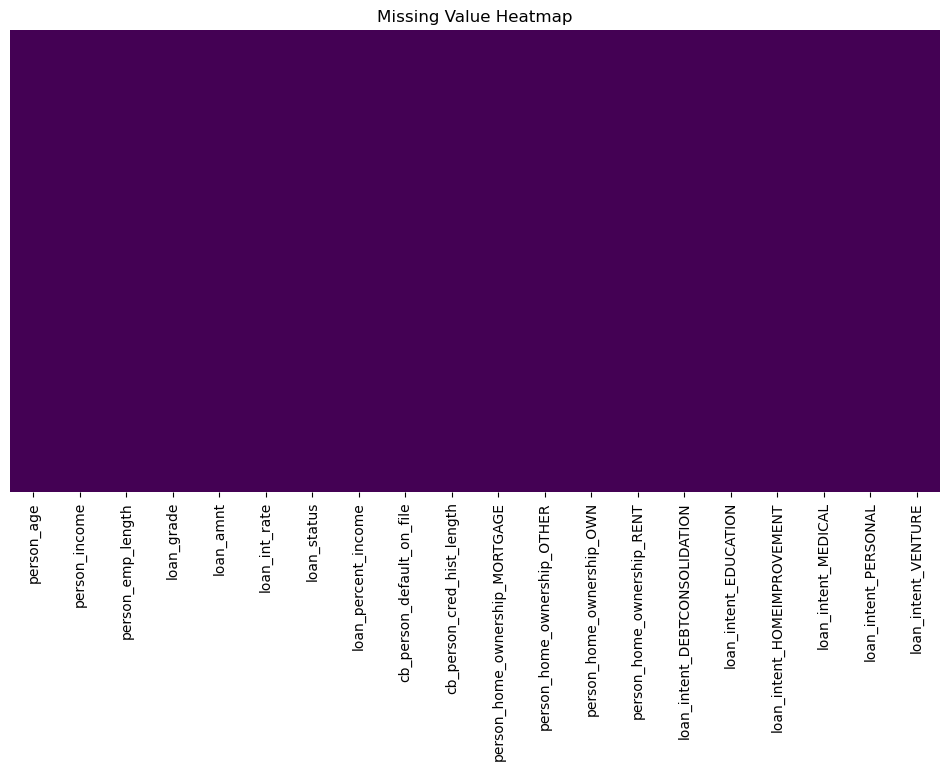

In [69]:
# null value analysis

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

In [70]:
df.isnull().sum()

person_age                        0
person_income                     0
person_emp_length                 0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_status                       0
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
dtype: int64

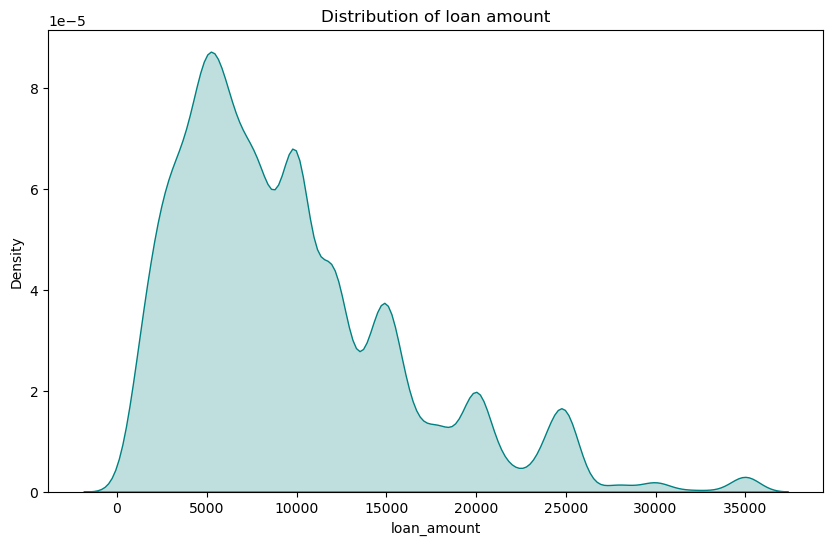

In [73]:
# Univariate distribution loan amount

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='loan_amnt', fill=True, color='teal')
plt.title('Distribution of loan amount')
plt.xlabel('loan_amount')
plt.ylabel('Density')
plt.show()

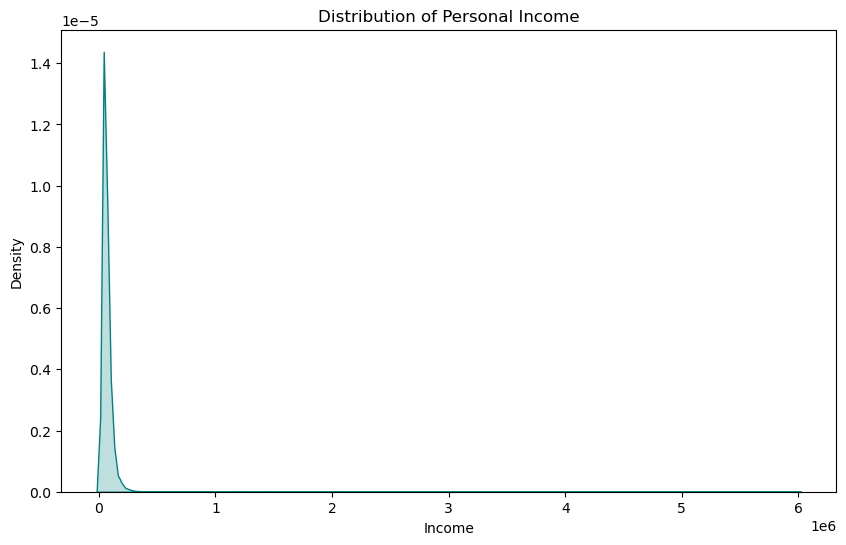

In [74]:
# Univariate distribution person_income

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='person_income', fill=True, color='teal')
plt.title('Distribution of Personal Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

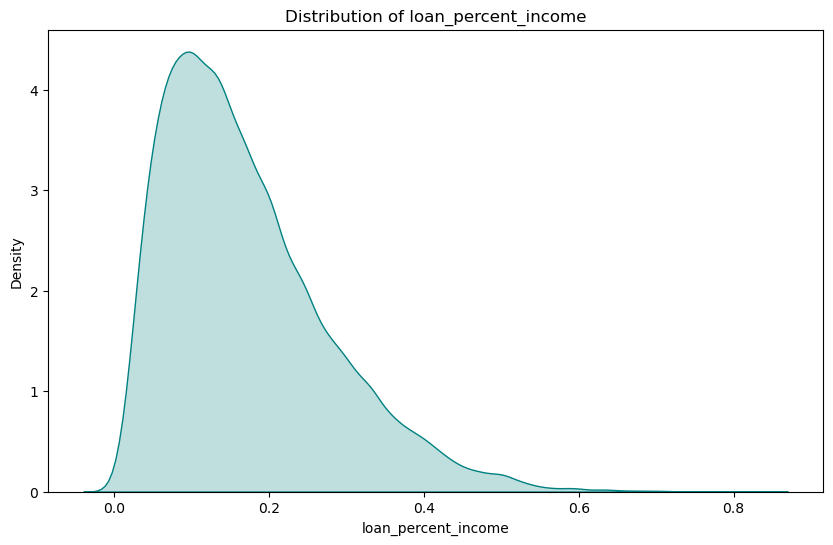

In [75]:
# Univariate distribution loan_percent_income

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='loan_percent_income', fill=True, color='teal')
plt.title('Distribution of loan_percent_income')
plt.xlabel('loan_percent_income')
plt.ylabel('Density')
plt.show()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_emp_length               32581 non-null  float64
 3   loan_grade                      32581 non-null  int64  
 4   loan_amnt                       32581 non-null  int64  
 5   loan_int_rate                   32581 non-null  float64
 6   loan_status                     32581 non-null  int64  
 7   loan_percent_income             32581 non-null  float64
 8   cb_person_default_on_file       32581 non-null  int64  
 9   cb_person_cred_hist_length      32581 non-null  int64  
 10  person_home_ownership_MORTGAGE  32581 non-null  int64  
 11  person_home_ownership_OTHER     32581 non-null  int64  
 12  person_home_ownership_OWN       

# Feature engineering

In [78]:
# Already done during preprocessing

# Model Preparation: Train-Test Split

In [79]:
from sklearn.model_selection import train_test_split

# Seperate target and features
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Training

### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8511585085161885
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      5095
           1       0.75      0.48      0.58      1422

    accuracy                           0.85      6517
   macro avg       0.81      0.72      0.75      6517
weighted avg       0.84      0.85      0.84      6517



D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
# Scaling the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and fit the model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8562221881233697
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      5095
           1       0.75      0.51      0.61      1422

    accuracy                           0.86      6517
   macro avg       0.81      0.73      0.76      6517
weighted avg       0.85      0.86      0.85      6517



### Rnadom Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_rf_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Classification Report:\n", classification_report(y_test, y_rf_pred))

Accuracy: 0.935246278962713
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      5095
           1       0.98      0.72      0.83      1422

    accuracy                           0.94      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.94      0.94      0.93      6517



In [89]:
# Feature importance -> Find out which features drive predictions most.

pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)

loan_percent_income               0.227889
person_income                     0.142558
loan_int_rate                     0.115938
loan_grade                        0.110531
loan_amnt                         0.071978
person_emp_length                 0.059091
person_home_ownership_RENT        0.057218
person_age                        0.043595
cb_person_cred_hist_length        0.033671
person_home_ownership_MORTGAGE    0.025032
dtype: float64

In [ ]:
# since the recall and f1-score has improved. However, we need to improve it more as we have to correctly predict the default cases to avoid loss.

### XGBoost

In [91]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/150.0 MB 3.8 MB/s eta 0:00:39
    --------------------------------------- 2.6/150.0 MB 4.2 MB/s eta 0:00:36
   - -------------------------------------- 3.9/150.0 MB 4.7 MB/s eta 0:00:32
   - -------------------------------------- 5.2/150.0 MB 5.1 MB/s eta 0:00:29
   - -------------------------------------- 6.8/150.0 MB 5.4 MB/s eta 0:00:27
   -- ------------------------------------- 8.1/150.0 MB 5.5 MB/s eta 0:00:26
   -- ------------------------------------- 9.4/150.0 MB 5.6 MB/s eta 0:00:26
   -- ------------------------------------- 10.7/150.0 MB 5.6 MB/s eta 0:00:25
   --- ------------------------------------ 11.5/150.0 MB 5.5 MB/s eta 0:00:26
   --- ------------------------------------ 12.1/150.0 MB 5.2 MB/s eta 0:00:27
   --- ------------------------------------ 12.8/150.0 MB 5.1 MB/s eta 0:00

In [100]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Calculate class weight manually
negative_class = sum(y_train == 0)
positive_class = sum(y_train == 1)
scale_pos_weight = negative_class/positive_class

# Initiate the model
xgb_model = xgb.XGBClassifier(n_estimators = 100, max_depth = 5, learning_rate = 0.1, scale_pos_weight=scale_pos_weight,
                              eval_metric = 'logloss', random_state = 100)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_xgb_pred = xgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_xgb_pred))
print("Classification Report:\n", classification_report(y_test, y_xgb_pred))

Accuracy: 0.9172932330827067
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      5095
           1       0.83      0.79      0.81      1422

    accuracy                           0.92      6517
   macro avg       0.88      0.87      0.88      6517
weighted avg       0.92      0.92      0.92      6517

